In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive
import os

# Mounting My Google Drive for access to input and output folders
drive.mount('/content/drive')

Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Image_Name                 1007 non-null   object 
 1   SSIM                       1007 non-null   float64
 2   PixelMatch_DiffPercentage  1007 non-null   float64
 3   CLIP                       1007 non-null   float64
 4   HTML_Valid                 1007 non-null   bool   
 5   Semantic_Precision         1007 non-null   float64
 6   Semantic_Recall            1007 non-null   float64
 7   PixelMatch_Normalized      1007 non-null   float64
dtypes: bool(1), float64(6), object(1)
memory usage: 56.2+ KB
None
              SSIM  PixelMatch_DiffPercentage         CLIP  \
count  1007.000000                1007.000000  1007.000000   
mean      0.702456                  31.423183     0.685503   
std       0.128290                  21.618633     0.101150   
min       0.124885 

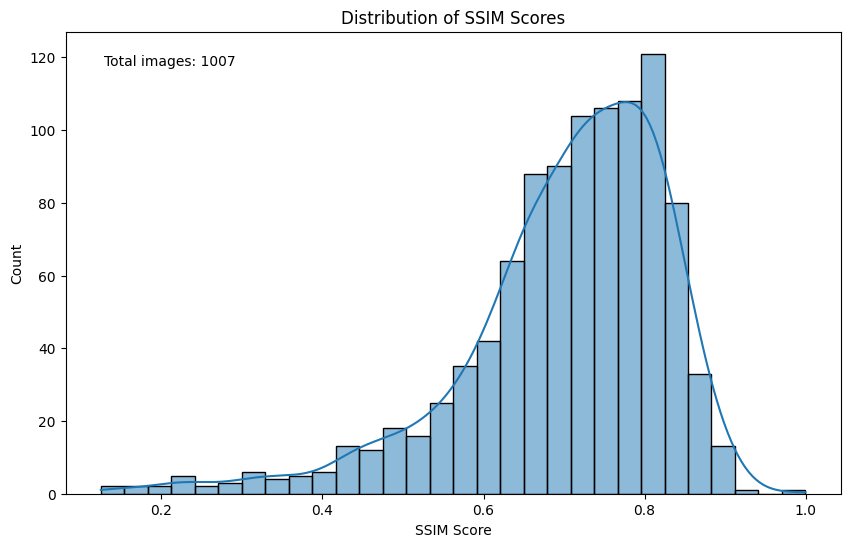

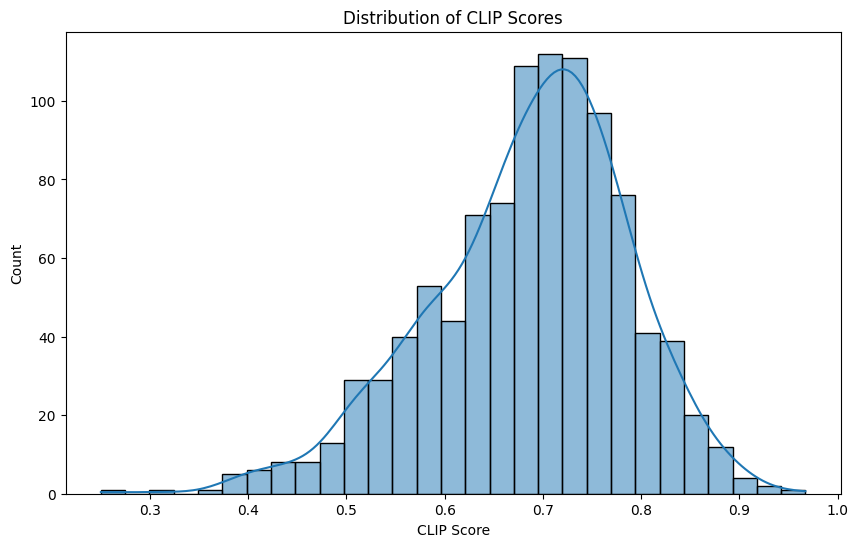

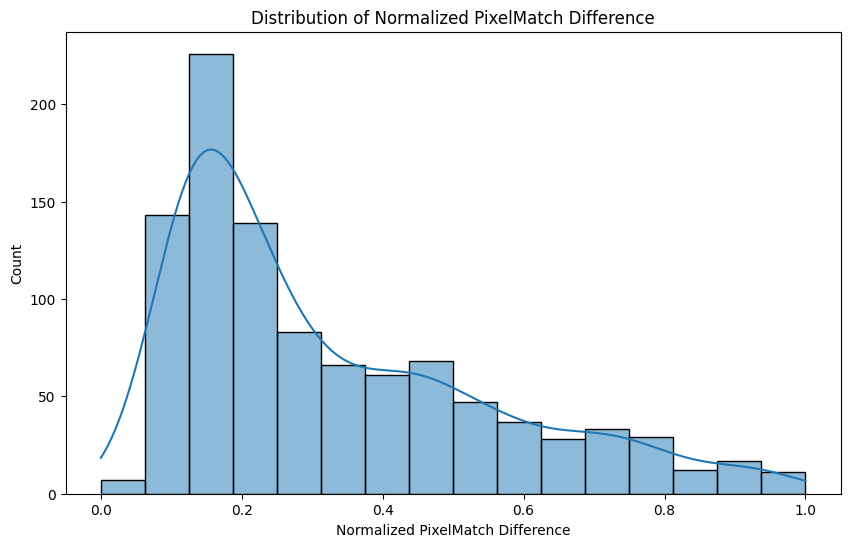

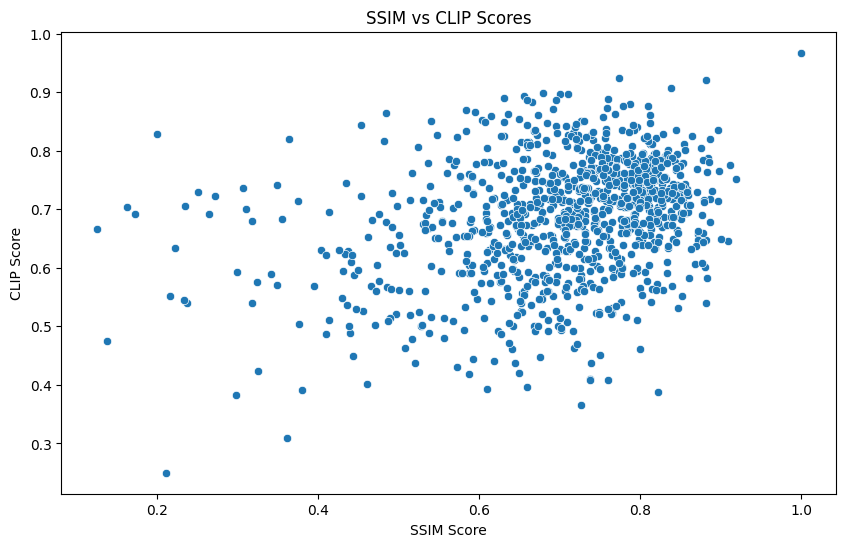

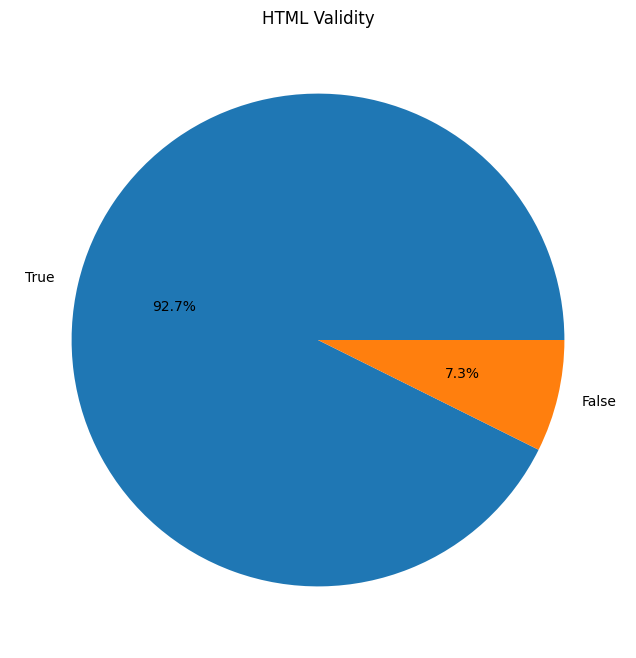

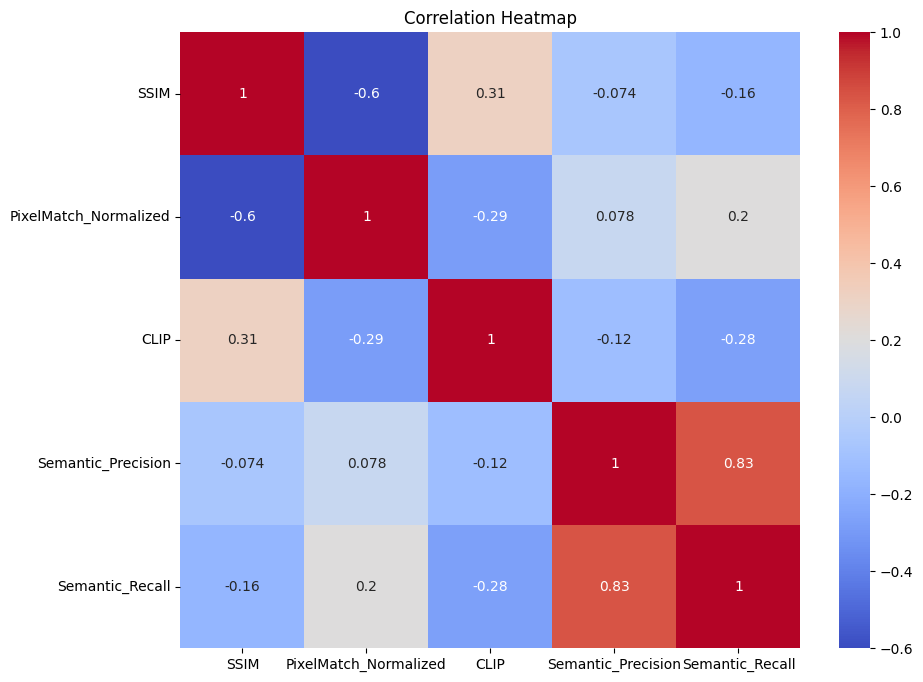

Average SSIM Score: 0.7025
Average CLIP Score: 0.6855
Average Normalized PixelMatch Difference: 0.3269
Percentage of Valid HTML: 0.00%
Average Semantic Precision: 0.0679
Average Semantic Recall: 0.4385

Top 30 websites by SSIM Score:
                               Image_Name      SSIM
482  A930FCEC-FF8B-4277-B1B4-96BF682C0713  0.999746
82   9A66761C-222D-4CAF-883D-34F851A26E11  0.918491
157  5F022D9E-CB19-492C-AD85-189A622FD299  0.912067
483  5F2F2DEB-1E17-4EC7-AD0F-1EE88F2C79CD  0.909482
704                            sketch_129  0.900082
33   E5D53F97-D3A2-4BB7-8107-6FB035F94722  0.897315
84   C74A6307-7A8E-429B-9513-2E1123B04F70  0.896370
759                       elitedomains.de  0.896292
67   9FED117B-BEB3-4DED-876F-9280B776F8AA  0.889665
152  4D588082-35DC-4E8C-B061-350E26DF6607  0.887102
497  C6A6992D-B827-4BD4-AFA8-C41A10B58F39  0.886358
94   19A45766-B53C-4F2C-ABC4-9C6825900F8B  0.886311
965                          findnerd.com  0.885442
66   EACB242F-842B-4652-952B-D596A11FA

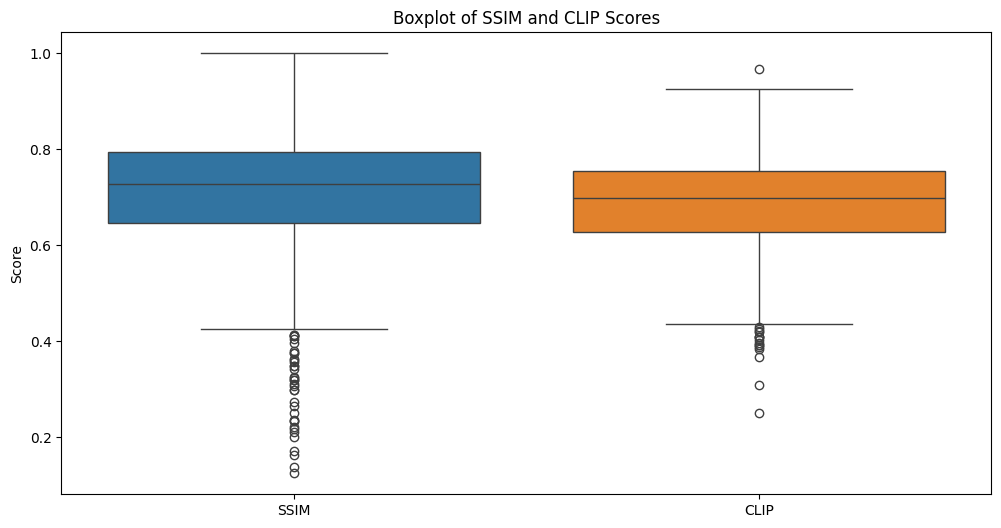

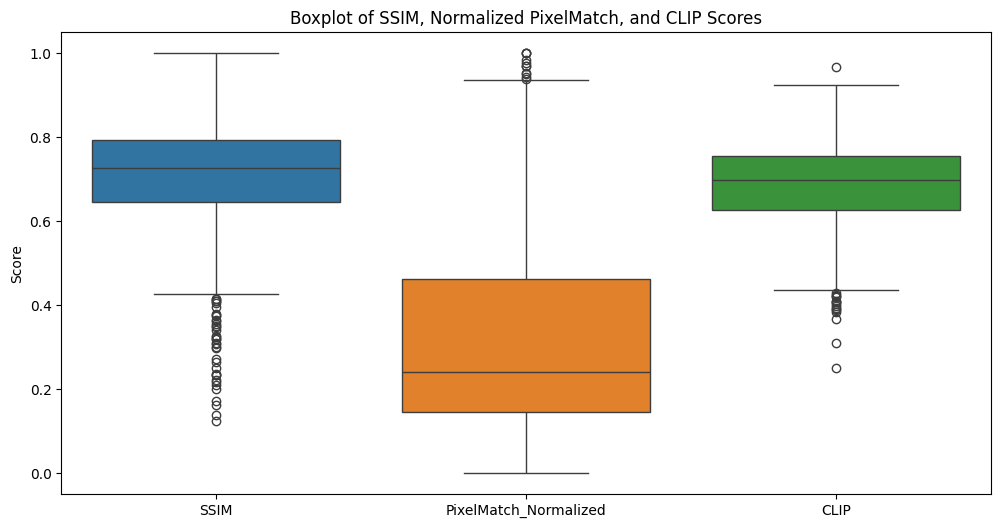

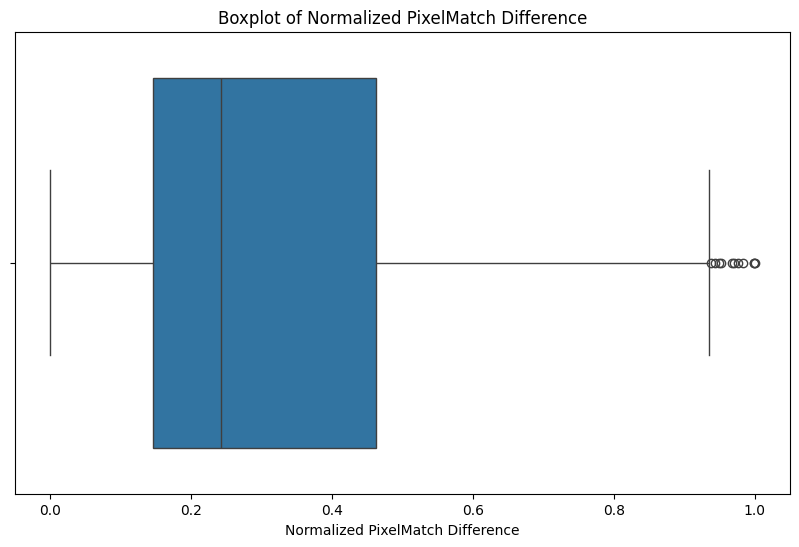

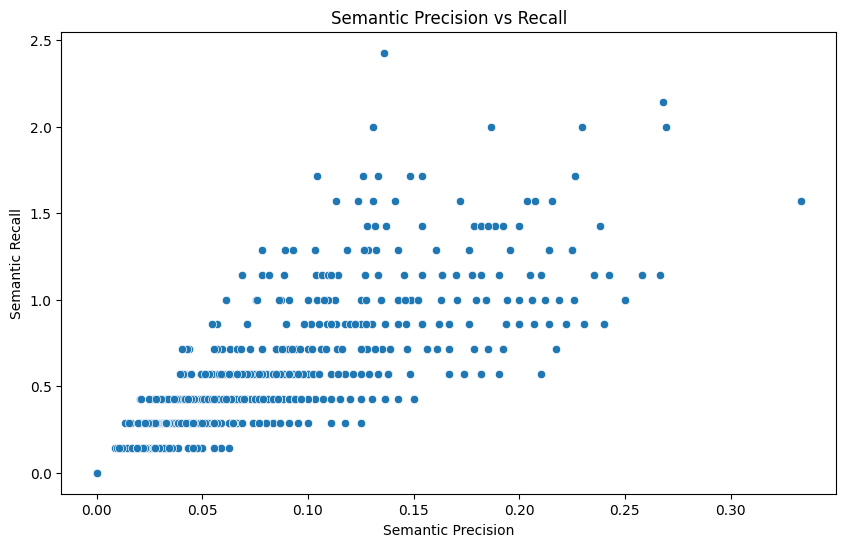

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from sklearn.preprocessing import MinMaxScaler

# Loading the input csv file for Analysis
data = pd.read_csv('/content/drive/MyDrive/Dissertation Aditya Parmar/GPT_4o_image_metrics_output.csv', skiprows=1, header=None)

# Assigning column names
data.columns = ['Image_Name', 'SSIM', 'PixelMatch_DiffPercentage', 'CLIP', 'HTML_Valid', 'Semantic_Precision', 'Semantic_Recall']

# Converting the data columns to appropriate data types
numeric_columns = ['SSIM', 'PixelMatch_DiffPercentage', 'CLIP', 'Semantic_Precision', 'Semantic_Recall']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Function for categorising the input folder into respective datasets (Pix2Code, Bootstrap Synthetic, Synthetic Sketch, WebUI2Code )
def categorize_dataset(image_name):
    if image_name.startswith('rw_'):
        return 'Bootstrap Synthetic'
    elif image_name.startswith('sketch'):
        return 'Bootstrap Sketch'
    elif re.match(r'^[A-Z0-9-]+$', image_name):
        return 'Pix2Code'
    else:
        return 'WebUI2Code'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
# data = pd.read_csv('web_metrics.csv')
# Normalising the PixelMatch_DiffPercentage to 0-1 scale
scaler = MinMaxScaler()
data['PixelMatch_Normalized'] = scaler.fit_transform(data[['PixelMatch_DiffPercentage']])

# Basic data exploration
print(data.info())
print(data.describe())

# Showing distribution of SSIM scores
plt.figure(figsize=(10, 6))
sns.histplot(data['SSIM'], kde=True, bins=30, stat='count')
plt.title('Distribution of SSIM Scores')
plt.xlabel('SSIM Score')
plt.ylabel('Count')
plt.text(0.05, 0.95, f'Total images: {len(data)}', transform=plt.gca().transAxes,
         verticalalignment='top')
plt.show()


# Distribution of CLIP scores
plt.figure(figsize=(10, 6))
sns.histplot(data['CLIP'], kde=True)
plt.title('Distribution of CLIP Scores')
plt.xlabel('CLIP Score')
plt.ylabel('Count')
plt.show()

# Distribution of Normalized PixelMatch Difference
plt.figure(figsize=(10, 6))
sns.histplot(data['PixelMatch_Normalized'], kde=True)
plt.title('Distribution of Normalized PixelMatch Difference')
plt.xlabel('Normalized PixelMatch Difference')
plt.ylabel('Count')
plt.show()

# Scatter plot of SSIM vs CLIP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SSIM', y='CLIP', data=data)
plt.title('SSIM vs CLIP Scores')
plt.xlabel('SSIM Score')
plt.ylabel('CLIP Score')
plt.show()

# HTML Validity pie chart
html_valid_counts = data['HTML_Valid'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(html_valid_counts, labels=html_valid_counts.index, autopct='%1.1f%%')
plt.title('HTML Validity')
plt.show()

# Correlation heatmap
correlation_matrix = data[['SSIM', 'PixelMatch_Normalized', 'CLIP', 'Semantic_Precision', 'Semantic_Recall']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Calculating and printing some statistics
print(f"Average SSIM Score: {data['SSIM'].mean():.4f}")
print(f"Average CLIP Score: {data['CLIP'].mean():.4f}")
print(f"Average Normalized PixelMatch Difference: {data['PixelMatch_Normalized'].mean():.4f}")
print(f"Percentage of Valid HTML: {(data['HTML_Valid'] == 'TRUE').mean() * 100:.2f}%")
print(f"Average Semantic Precision: {data['Semantic_Precision'].mean():.4f}")
print(f"Average Semantic Recall: {data['Semantic_Recall'].mean():.4f}")

# Identifing top performing websites
top_ssim = data.nlargest(30, 'SSIM')
top_clip = data.nlargest(30, 'CLIP')
top_pixel_match = data.nsmallest(30, 'PixelMatch_Normalized')

print("\nTop 30 websites by SSIM Score:")
print(top_ssim[['Image_Name', 'SSIM']])

print("\nTop 30 websites by CLIP Score:")
print(top_clip[['Image_Name', 'CLIP']])

print("\nTop 30 websites with least Normalized PixelMatch Difference:")
print(top_pixel_match[['Image_Name', 'PixelMatch_Normalized']])

# Combining Boxplot for SSIM and CLIP
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['SSIM', 'CLIP']])
plt.title('Boxplot of SSIM and CLIP Scores')
plt.ylabel('Score')
plt.show()

# Combining Boxplot for SSIM, Normalized PixelMatch, and CLIP
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['SSIM', 'PixelMatch_Normalized', 'CLIP']])
plt.title('Boxplot of SSIM, Normalized PixelMatch, and CLIP Scores')
plt.ylabel('Score')
plt.show()

# Boxplot for Normalized PixelMatch Difference
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['PixelMatch_Normalized'])
plt.title('Boxplot of Normalized PixelMatch Difference')
plt.xlabel('Normalized PixelMatch Difference')
plt.show()

# Scatter plot of Semantic Precision vs Recall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Semantic_Precision', y='Semantic_Recall', data=data)
plt.title('Semantic Precision vs Recall')
plt.xlabel('Semantic Precision')
plt.ylabel('Semantic Recall')
plt.show()

<Figure size 1600x1000 with 0 Axes>

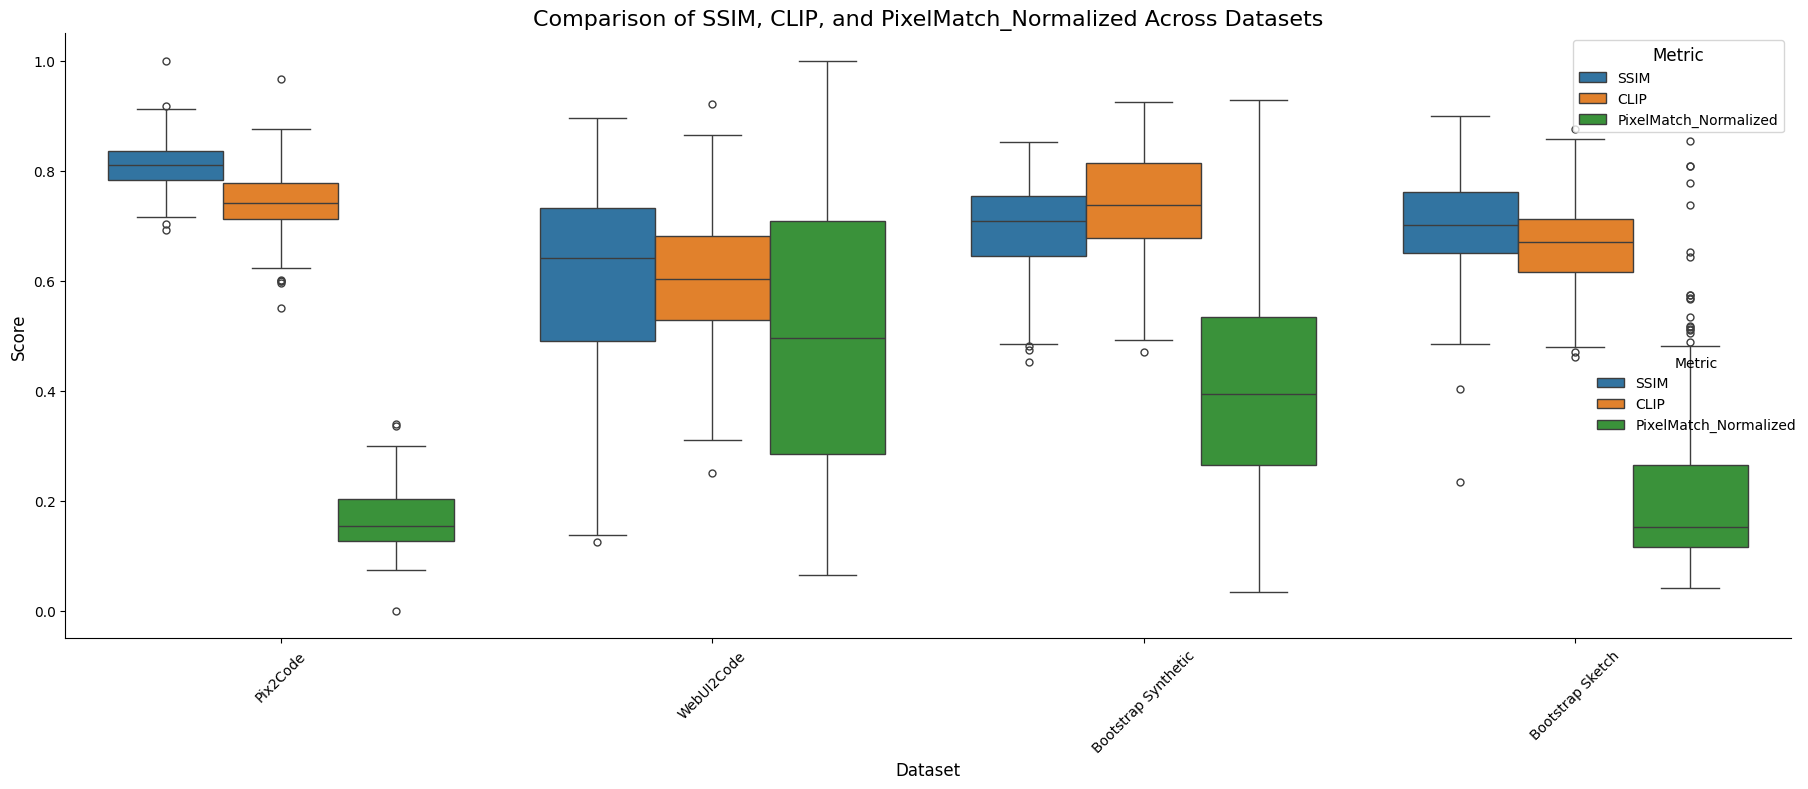


Summary Statistics:
                                             mean  median     std
Dataset             Metric                                       
Bootstrap Sketch    CLIP                   0.6650  0.6715  0.0745
                    PixelMatch_Normalized  0.2159  0.1529  0.1519
                    SSIM                   0.7028  0.7014  0.0897
Bootstrap Synthetic CLIP                   0.7378  0.7388  0.0907
                    PixelMatch_Normalized  0.4073  0.3943  0.1871
                    SSIM                   0.6957  0.7084  0.0797
Pix2Code            CLIP                   0.7385  0.7411  0.0523
                    PixelMatch_Normalized  0.1687  0.1551  0.0541
                    SSIM                   0.8092  0.8114  0.0431
WebUI2Code          CLIP                   0.6028  0.6036  0.1073
                    PixelMatch_Normalized  0.5116  0.4964  0.2502
                    SSIM                   0.6045  0.6414  0.1678


In [ ]:
melted_data = pd.melt(data,
                      id_vars=['Dataset'],
                      value_vars=['SSIM', 'CLIP', 'PixelMatch_Normalized'],
                      var_name='Metric',
                      value_name='Score')

# Create the combined plot
plt.figure(figsize=(16, 10))
sns.catplot(data=melted_data, x='Dataset', y='Score', hue='Metric', kind='box', height=8, aspect=2)

plt.title('Comparison of SSIM, CLIP, and PixelMatch_Normalized Across Datasets', fontsize=16)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric', title_fontsize='12', fontsize='10')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Optionally, calculate and print summary statistics
print("\nSummary Statistics:")
summary = melted_data.groupby(['Dataset', 'Metric'])['Score'].agg(['mean', 'median', 'std']).round(4)
print(summary)

One-way ANOVA Results:

SSIM:
F-value: 158.29484730124662
p-value: 5.432534817642705e-84

CLIP:
F-value: 153.56642300938344
p-value: 6.778721959984539e-82

PixelMatch_Normalized:
F-value: 211.3200915541188
p-value: 3.235189294303716e-106

Semantic_Precision:
F-value: 31.791804284923693
p-value: 1.237723205944155e-19

Semantic_Recall:
F-value: 62.60909279586528
p-value: 4.153526671207889e-37


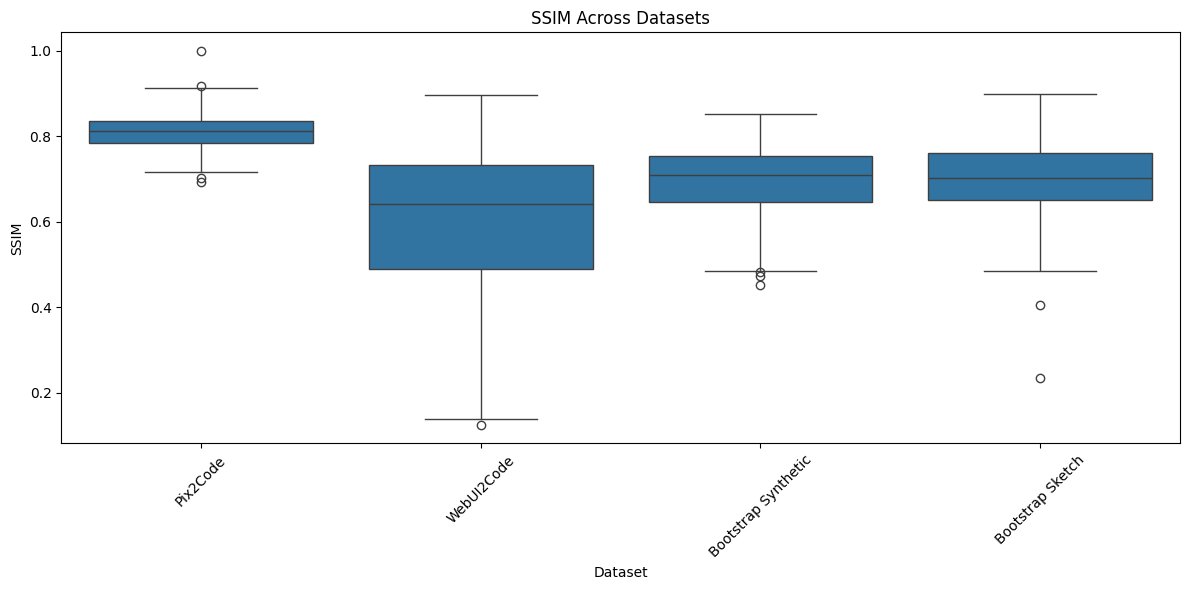

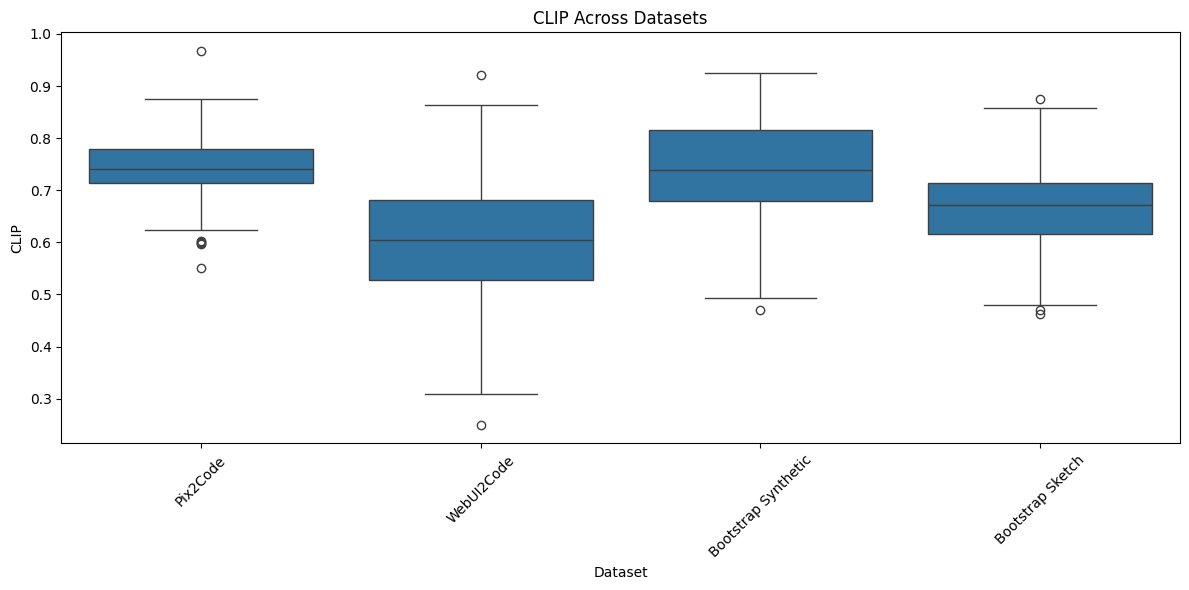

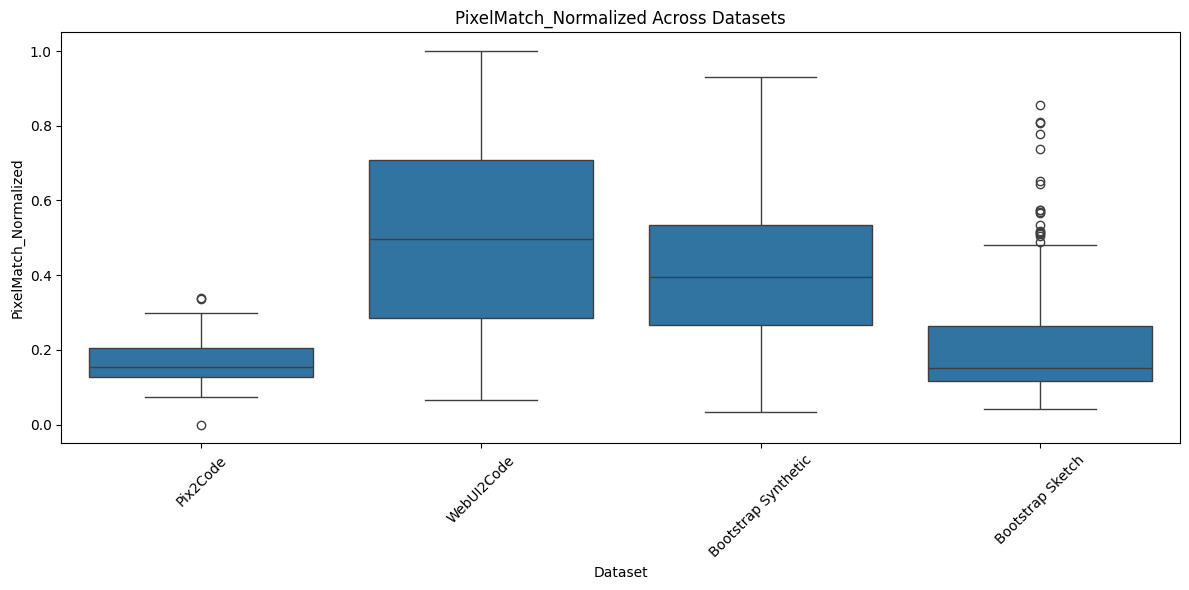

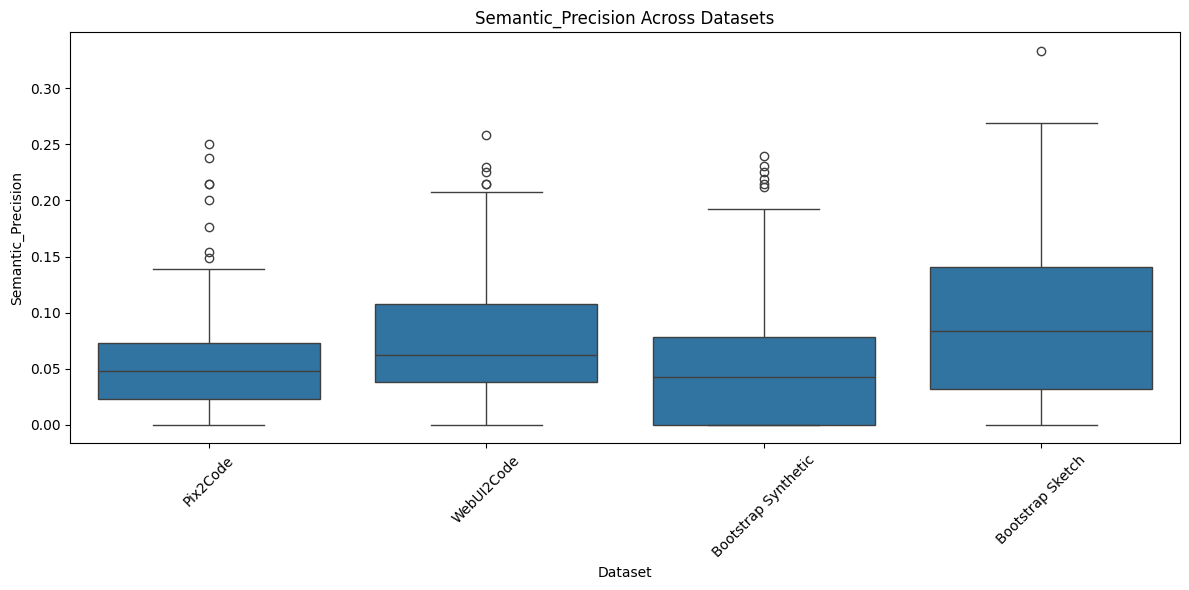

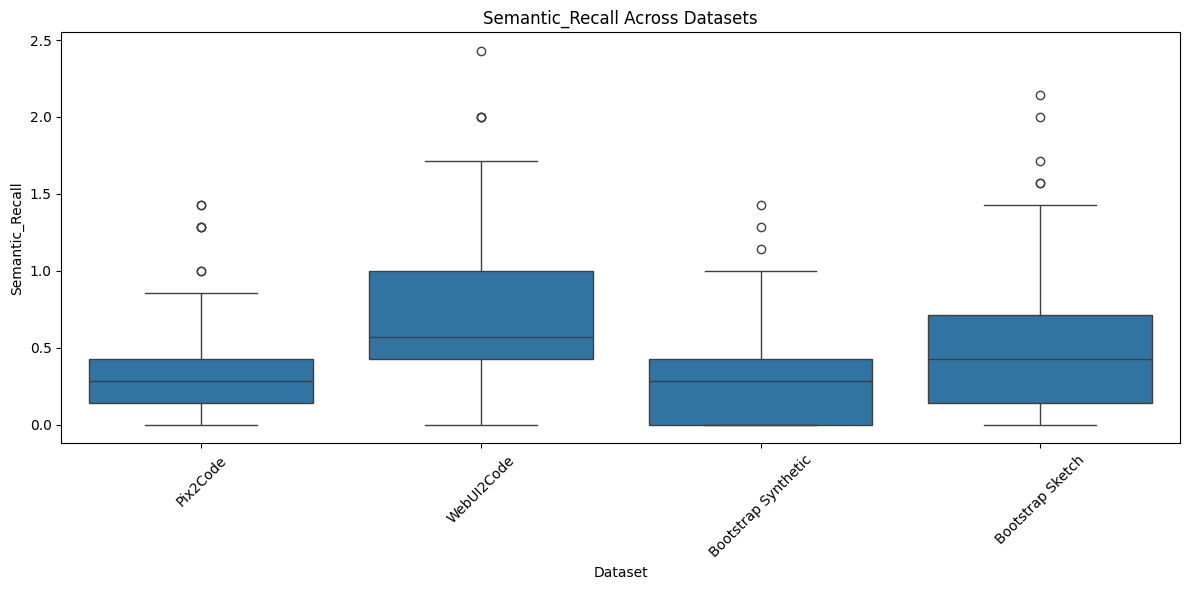

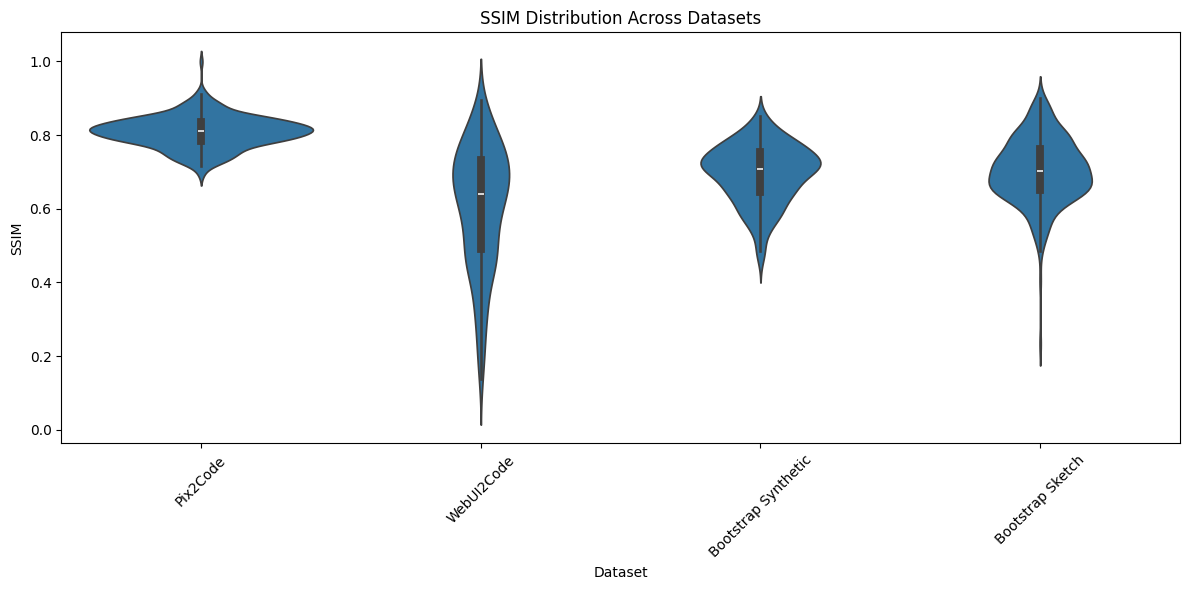

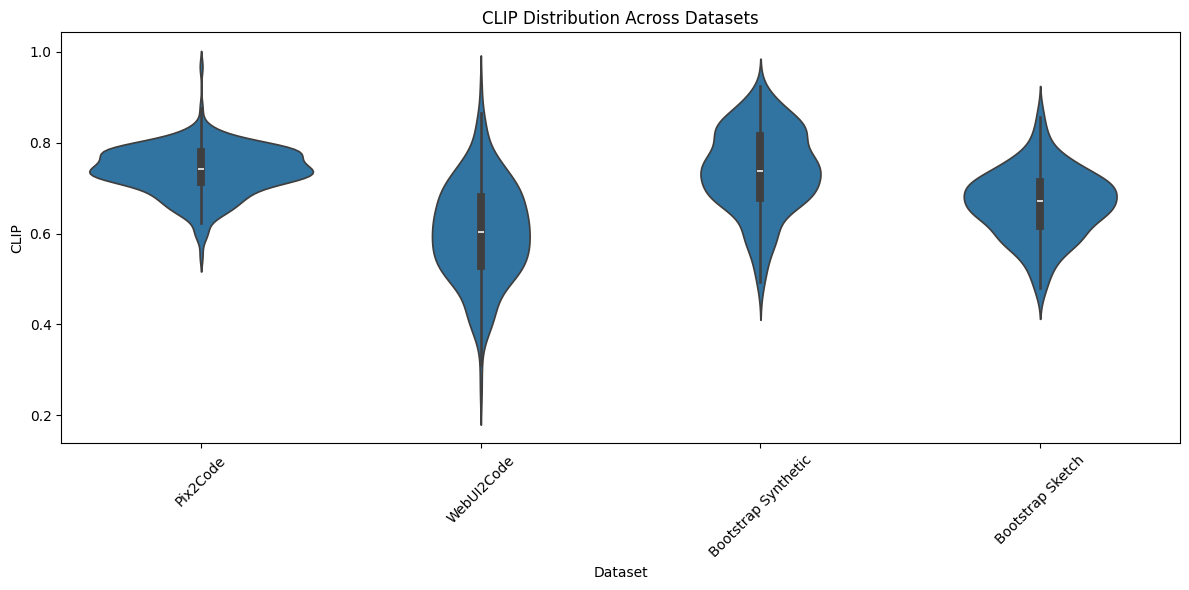

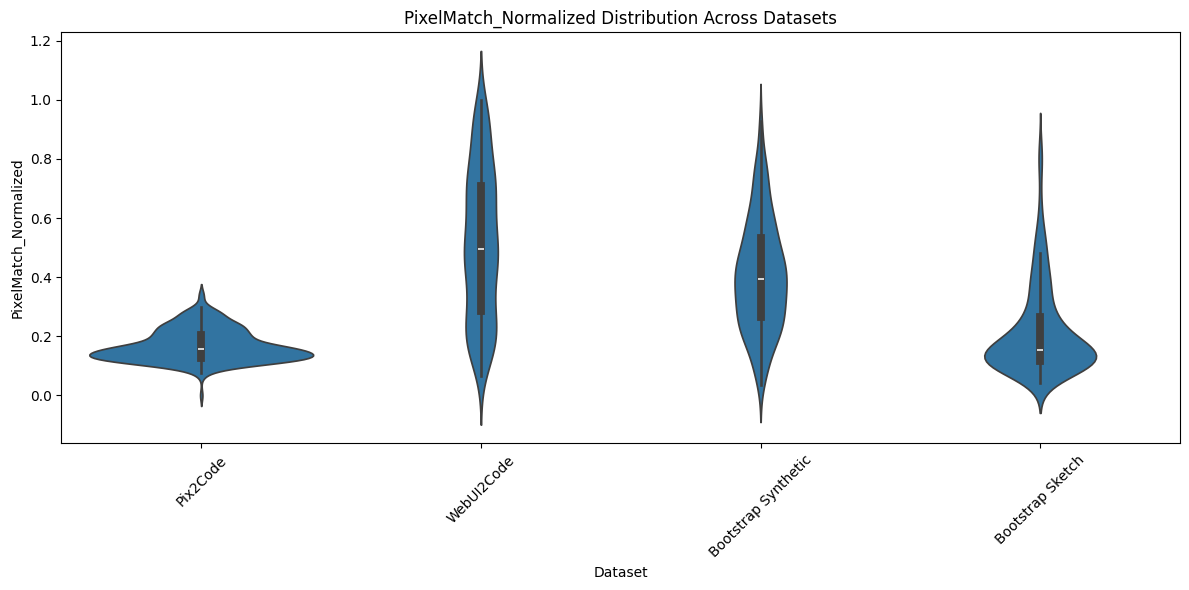

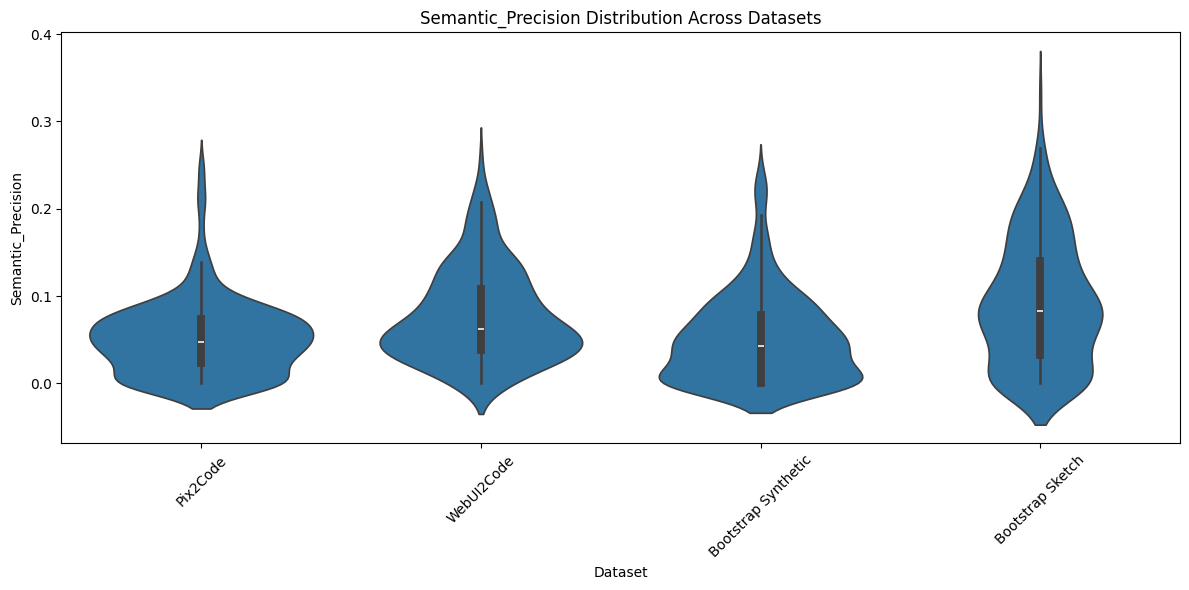

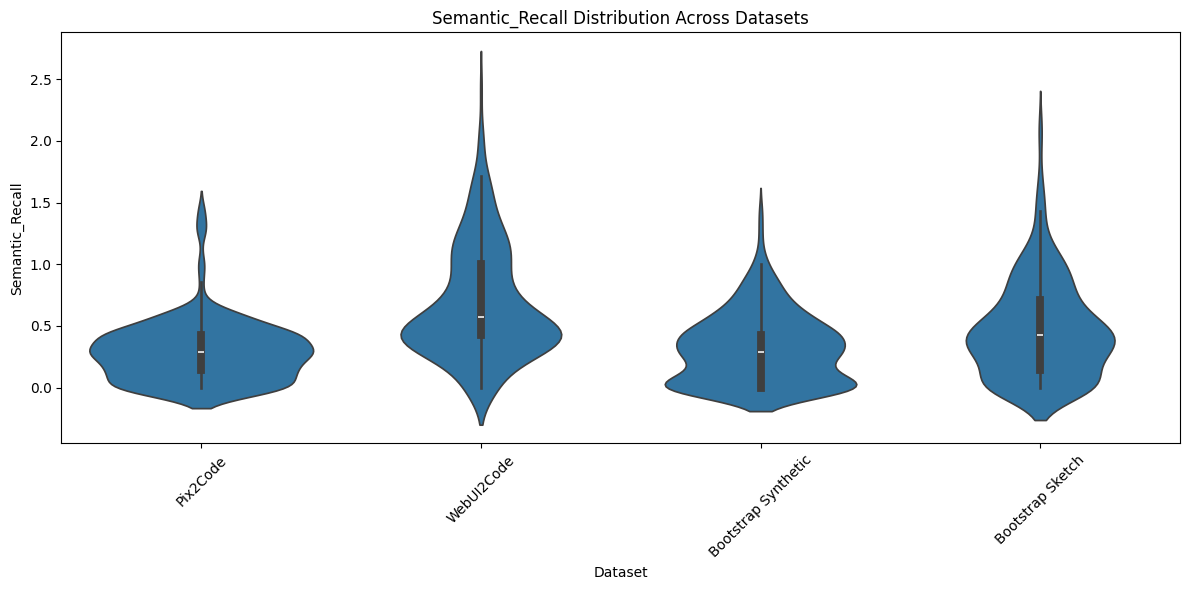


Mean Values for Each Metric Across Datasets:
                         SSIM      CLIP  PixelMatch_Normalized  \
Dataset                                                          
Bootstrap Sketch     0.702781  0.664969               0.215875   
Bootstrap Synthetic  0.695673  0.737792               0.407337   
Pix2Code             0.809247  0.738467               0.168682   
WebUI2Code           0.604475  0.602848               0.511600   

                     Semantic_Precision  Semantic_Recall  
Dataset                                                   
Bootstrap Sketch               0.091318         0.466135  
Bootstrap Synthetic            0.051178         0.316571  
Pix2Code                       0.051570         0.289714  
WebUI2Code                     0.077071         0.675781  


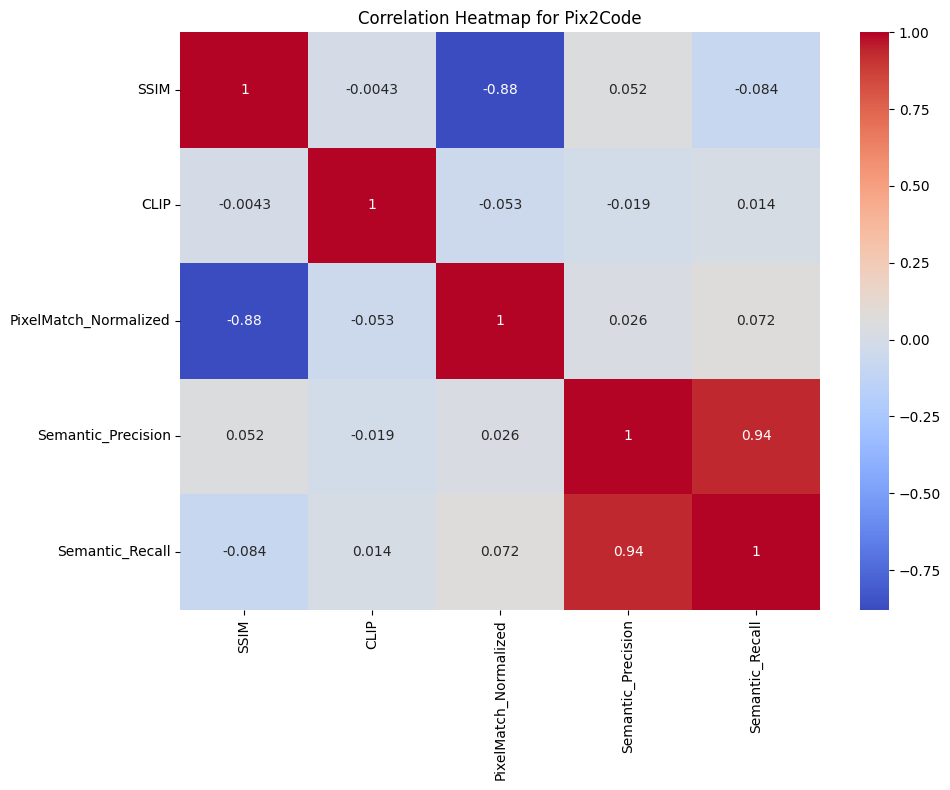

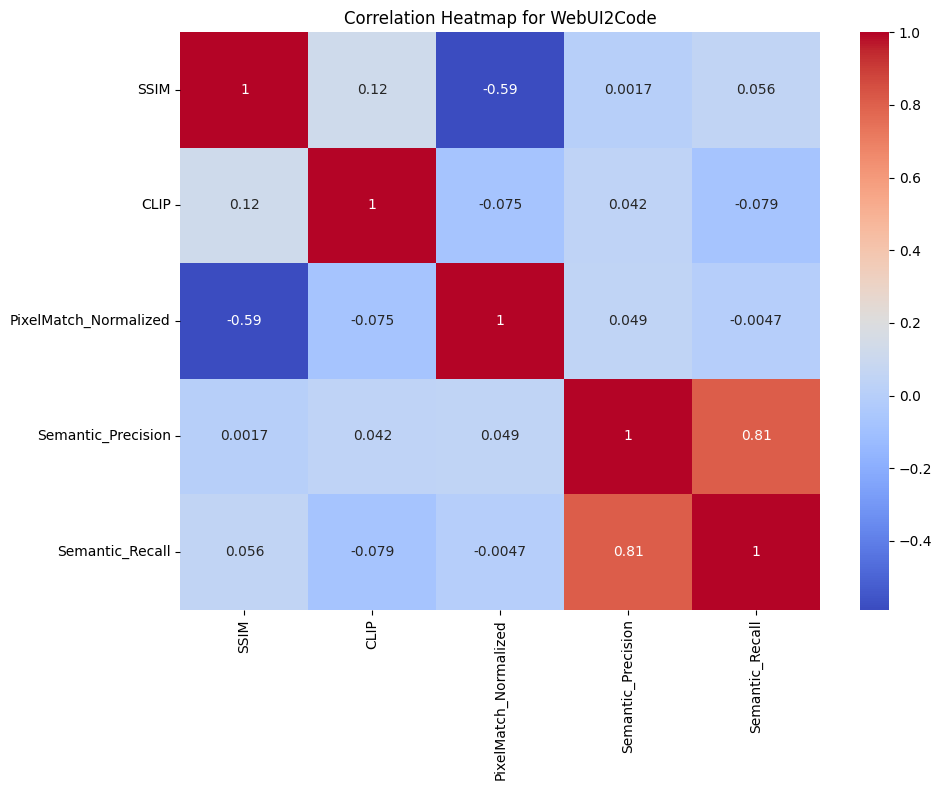

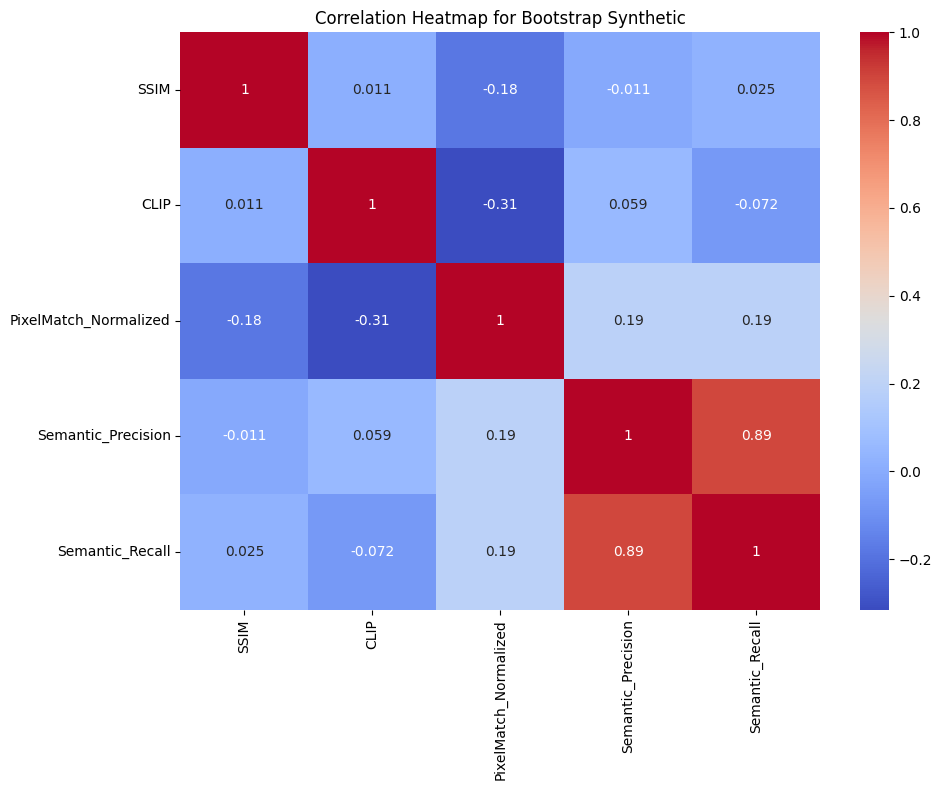

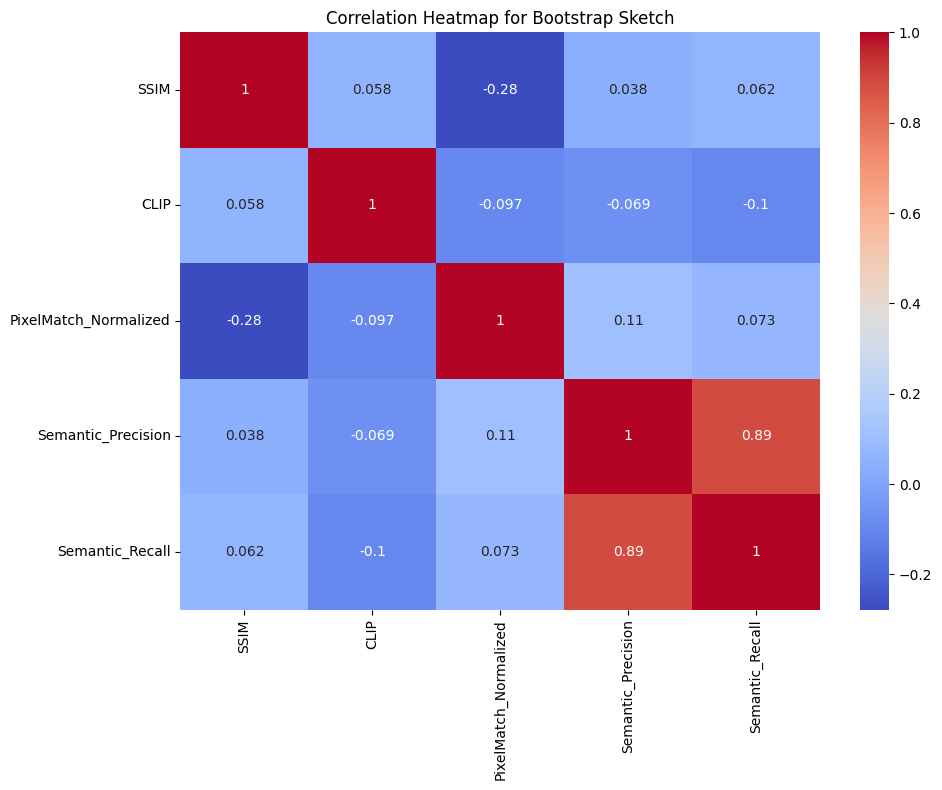

In [ ]:
# Function to categorize datasets
def categorize_dataset(image_name):
    if image_name.startswith('rw_'):
        return 'Bootstrap Synthetic'
    elif image_name.startswith('sketch'):
        return 'Bootstrap Sketch'
    elif re.match(r'^[A-Z0-9-]+$', image_name):
        return 'Pix2Code'
    else:
        return 'WebUI2Code'

# Apply dataset categorization
image_name_column = data.columns[0]  # Assuming the first column is the image/website name
data['Dataset'] = data[image_name_column].apply(categorize_dataset)

# Ensure PixelMatch_Normalized exists, if not, create it
if 'PixelMatch_Normalized' not in data.columns:
    scaler = MinMaxScaler()
    data['PixelMatch_Normalized'] = scaler.fit_transform(data[['PixelMatch_DiffPercentage']])

# Define metrics for analysis
metrics = ['SSIM', 'CLIP', 'PixelMatch_Normalized', 'Semantic_Precision', 'Semantic_Recall']

# Perform one-way ANOVA for each metric
print("One-way ANOVA Results:")
for metric in metrics:
    groups = [group[metric] for name, group in data.groupby('Dataset')]
    f_value, p_value = stats.f_oneway(*groups)
    print(f"\n{metric}:")
    print(f"F-value: {f_value}")
    print(f"p-value: {p_value}")

# Boxplots for each metric across datasets
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Dataset', y=metric, data=data)
    plt.title(f'{metric} Across Datasets')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Violin plots for each metric across datasets
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Dataset', y=metric, data=data)
    plt.title(f'{metric} Distribution Across Datasets')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Calculate and print mean values for each metric across datasets
print("\nMean Values for Each Metric Across Datasets:")
print(data.groupby('Dataset')[metrics].mean())

# Heatmap of correlation matrices for each dataset
for dataset in data['Dataset'].unique():
    plt.figure(figsize=(10, 8))
    subset = data[data['Dataset'] == dataset]
    correlation_matrix = subset[metrics].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for {dataset}')
    plt.tight_layout()
    plt.show()

Pairwise t-tests:

SSIM:
Pix2Code vs WebUI2Code:
t-statistic: 18.6996
p-value: 0.0000
Pix2Code vs Bootstrap Synthetic:
t-statistic: 19.8320
p-value: 0.0000
Pix2Code vs Bootstrap Sketch:
t-statistic: 16.9201
p-value: 0.0000
WebUI2Code vs Bootstrap Synthetic:
t-statistic: -7.7786
p-value: 0.0000
WebUI2Code vs Bootstrap Sketch:
t-statistic: -8.2016
p-value: 0.0000
Bootstrap Synthetic vs Bootstrap Sketch:
t-statistic: -0.9376
p-value: 0.3489

CLIP:
Pix2Code vs WebUI2Code:
t-statistic: 17.9994
p-value: 0.0000
Pix2Code vs Bootstrap Synthetic:
t-statistic: 0.1019
p-value: 0.9188
Pix2Code vs Bootstrap Sketch:
t-statistic: 12.7750
p-value: 0.0000
WebUI2Code vs Bootstrap Synthetic:
t-statistic: -15.2609
p-value: 0.0000
WebUI2Code vs Bootstrap Sketch:
t-statistic: -7.5584
p-value: 0.0000
Bootstrap Synthetic vs Bootstrap Sketch:
t-statistic: 9.8243
p-value: 0.0000

PixelMatch_Normalized:
Pix2Code vs WebUI2Code:
t-statistic: -21.1952
p-value: 0.0000
Pix2Code vs Bootstrap Synthetic:
t-statistic: -19

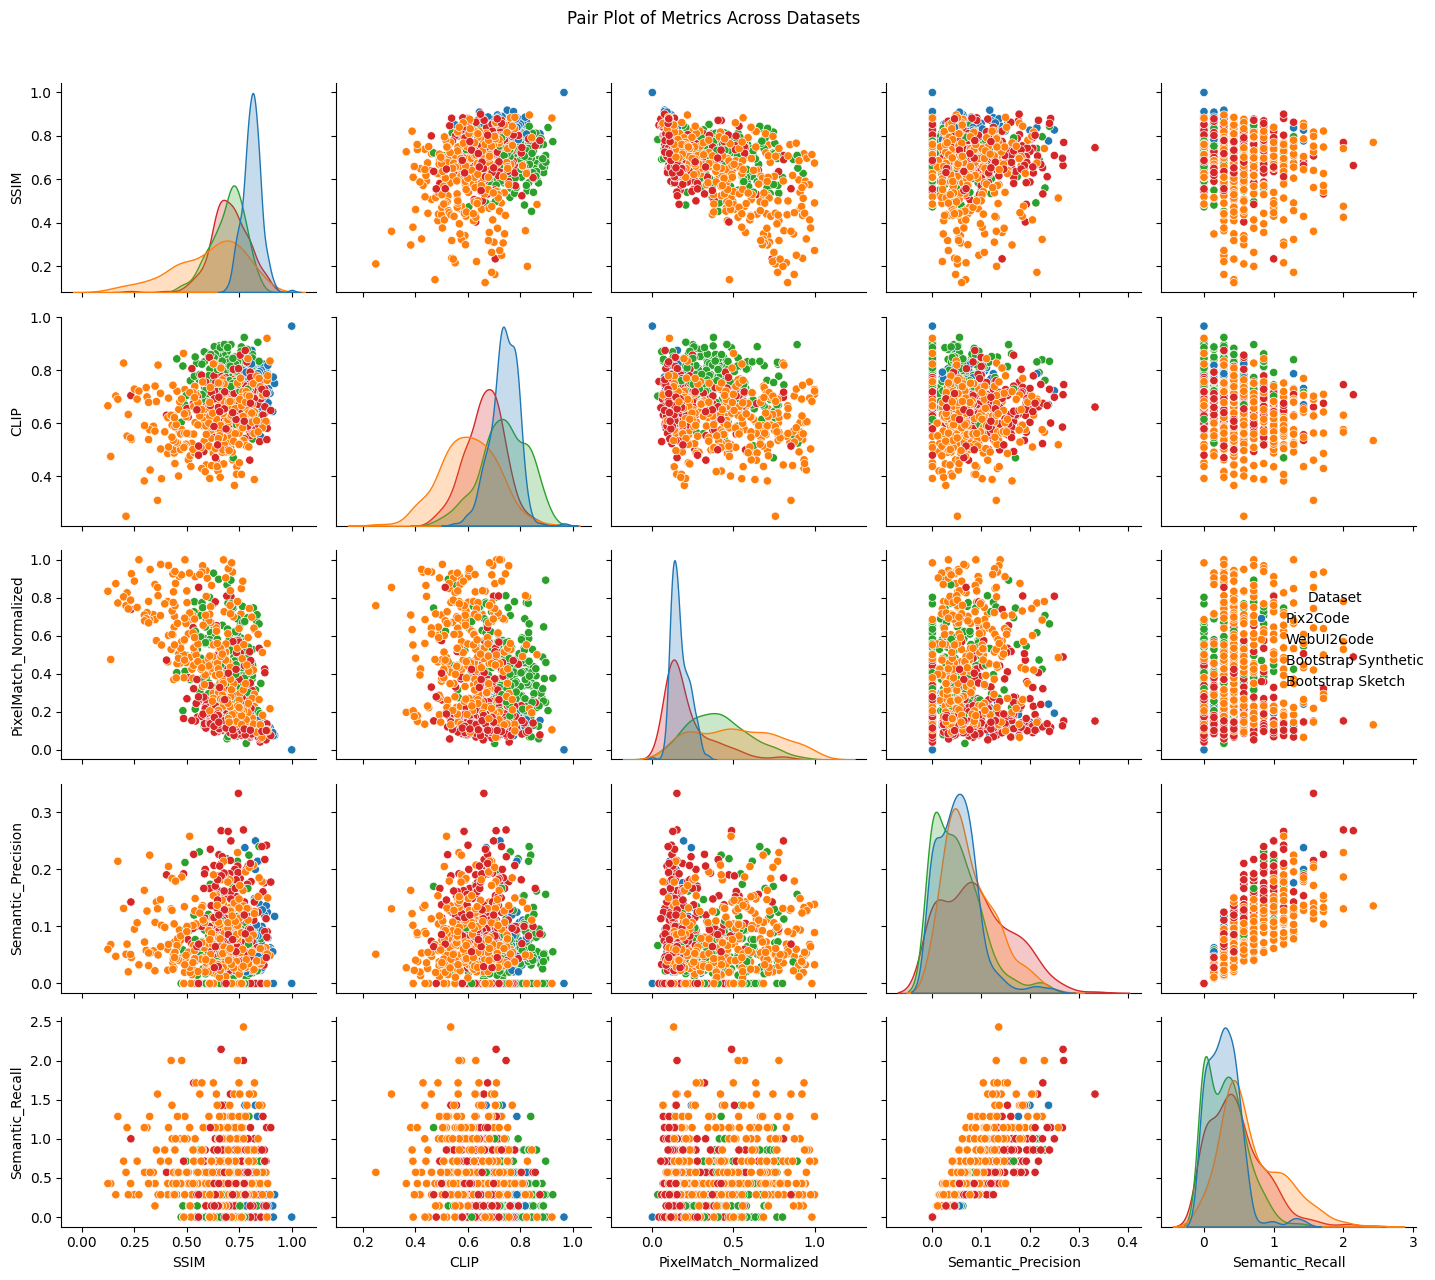

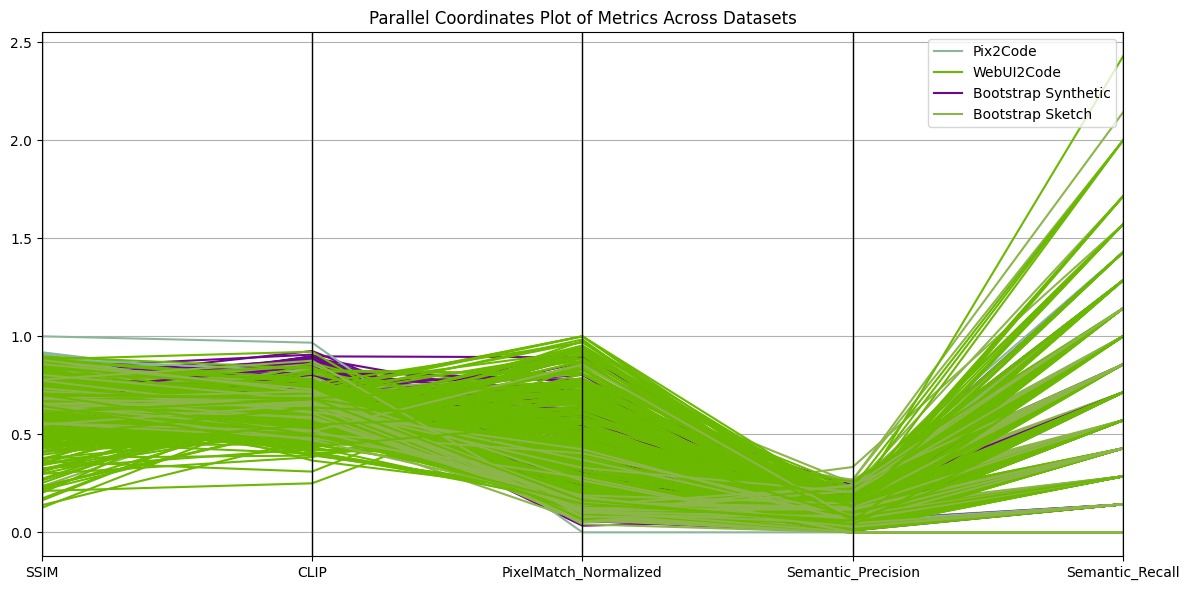

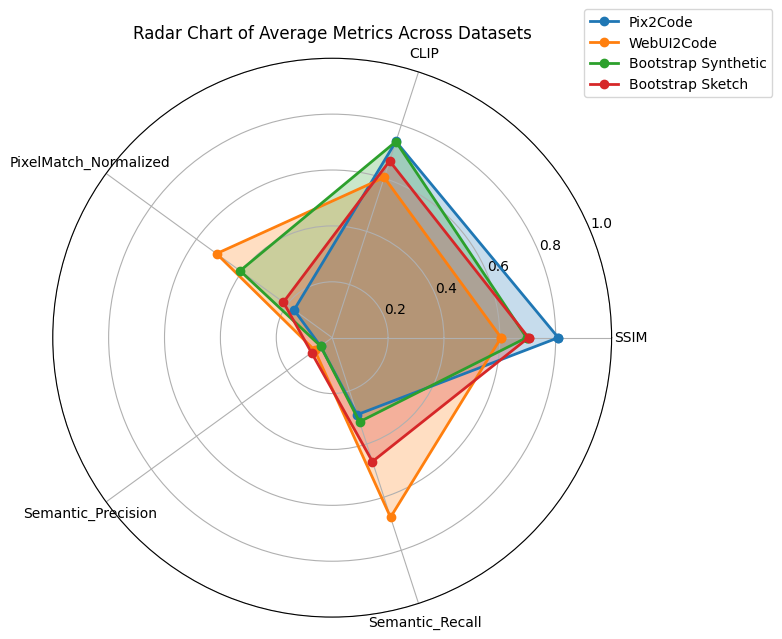


Statistical Summary:
                         SSIM                                    CLIP  \
                         mean       std       min       max      mean   
Dataset                                                                 
Bootstrap Sketch     0.702781  0.089729  0.234236  0.900082  0.664969   
Bootstrap Synthetic  0.695673  0.079655  0.452783  0.852812  0.737792   
Pix2Code             0.809247  0.043061  0.691906  0.999746  0.738467   
WebUI2Code           0.604475  0.167830  0.124885  0.896292  0.602848   

                                                  PixelMatch_Normalized  \
                          std       min       max                  mean   
Dataset                                                                   
Bootstrap Sketch     0.074472  0.461571  0.875431              0.215875   
Bootstrap Synthetic  0.090682  0.470323  0.924666              0.407337   
Pix2Code             0.052343  0.551206  0.967188              0.168682   
WebUI2Code      

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import combinations

# Assuming 'data' is already loaded and preprocessed from the previous cells

# Define metrics for analysis
metrics = ['SSIM', 'CLIP', 'PixelMatch_Normalized', 'Semantic_Precision', 'Semantic_Recall']

# Pairwise t-tests
print("Pairwise t-tests:")
for metric in metrics:
    print(f"\n{metric}:")
    for dataset1, dataset2 in combinations(data['Dataset'].unique(), 2):
        group1 = data[data['Dataset'] == dataset1][metric]
        group2 = data[data['Dataset'] == dataset2][metric]
        t_stat, p_value = stats.ttest_ind(group1, group2)
        print(f"{dataset1} vs {dataset2}:")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_value:.4f}")

# Effect size (Cohen's d) for pairwise comparisons
print("\nEffect Size (Cohen's d):")
for metric in metrics:
    print(f"\n{metric}:")
    for dataset1, dataset2 in combinations(data['Dataset'].unique(), 2):
        group1 = data[data['Dataset'] == dataset1][metric]
        group2 = data[data['Dataset'] == dataset2][metric]
        d = (group1.mean() - group2.mean()) / ((group1.var() + group2.var()) / 2) ** 0.5
        print(f"{dataset1} vs {dataset2}: {d:.4f}")

# Visualizations
# Pair plot
sns.pairplot(data, hue='Dataset', vars=metrics)
plt.suptitle("Pair Plot of Metrics Across Datasets", y=1.02)
plt.tight_layout()
plt.show()

# Parallel coordinates plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data, 'Dataset', cols=metrics)
plt.title("Parallel Coordinates Plot of Metrics Across Datasets")
plt.tight_layout()
plt.show()

# Radar chart
def radar_chart(data, metrics, datasets):
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Close the polygon

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

    for dataset in datasets:
        values = data[data['Dataset'] == dataset][metrics].mean().values
        values = np.concatenate((values, [values[0]]))  # Close the polygon
        ax.plot(angles, values, 'o-', linewidth=2, label=dataset)
        ax.fill(angles, values, alpha=0.25)

    ax.set_thetagrids(angles[:-1] * 180/np.pi, metrics)
    ax.set_ylim(0, 1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title("Radar Chart of Average Metrics Across Datasets")
    plt.tight_layout()
    plt.show()

radar_chart(data, metrics, data['Dataset'].unique())

# Statistical summary
print("\nStatistical Summary:")
summary = data.groupby('Dataset')[metrics].agg(['mean', 'std', 'min', 'max'])
print(summary)

# MANOVA (Multivariate Analysis of Variance)
from scipy.stats import f_oneway

print("\nMANOVA Results:")
f_values = []
p_values = []
for metric in metrics:
    groups = [group[metric] for name, group in data.groupby('Dataset')]
    f_value, p_value = f_oneway(*groups)
    f_values.append(f_value)
    p_values.append(p_value)

manova_results = pd.DataFrame({'Metric': metrics, 'F-value': f_values, 'p-value': p_values})
print(manova_results)

# Post-hoc analysis (if MANOVA is significant)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("\nPost-hoc Analysis (Tukey's HSD):")
for metric in metrics:
    print(f"\n{metric}:")
    tukey = pairwise_tukeyhsd(data[metric], data['Dataset'])
    print(tukey)


# THE END

In [ ]:
# Function to calculate percentage above threshold
def percentage_above_threshold(series, threshold):
    return (series > threshold).mean() * 100

# Function to calculate percentage below threshold
def percentage_below_threshold(series, threshold):
    return (series < threshold).mean() * 100

# Calculate metrics
total_images = len(data)
ssim_above_085 = percentage_above_threshold(data['SSIM'], 0.85)
ssim_above_075 = percentage_above_threshold(data['SSIM'], 0.75)
ssim_above_065 = percentage_above_threshold(data['SSIM'], 0.65)
clip_above_085 = percentage_above_threshold(data['CLIP'], 0.85)
clip_above_075 = percentage_above_threshold(data['CLIP'], 0.75)
clip_above_065 = percentage_above_threshold(data['CLIP'], 0.65)
pixel_below_35 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 35)
pixel_below_25 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 25)
pixel_below_15 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 15)


# Create summary table
summary_data = {
    'Metric': [
        'SSIM > 0.85', 'SSIM > 0.75', 'SSIM > 0.65',
        'CLIP > 0.85', 'CLIP > 0.75', 'CLIP > 0.65',
        'PixelMatch Diff < 35%', 'PixelMatch Diff < 25%', 'PixelMatch Diff < 15%'
    ],
    'Threshold': [0.85, 0.75, 0.65, 0.85, 0.75, 0.65, 35, 25, 15],
    'Count': [
        int(ssim_above_085 * total_images / 100),
        int(ssim_above_075 * total_images / 100),
        int(ssim_above_065 * total_images / 100),
        int(clip_above_085 * total_images / 100),
        int(clip_above_075 * total_images / 100),
        int(clip_above_065 * total_images / 100),
        int(pixel_below_35 * total_images / 100),
        int(pixel_below_25 * total_images / 100),
        int(pixel_below_15 * total_images / 100)
    ],
    'Percentage': [
        f"{ssim_above_085:.2f}%",
        f"{ssim_above_075:.2f}%",
        f"{ssim_above_065:.2f}%",
        f"{clip_above_085:.2f}%",
        f"{clip_above_075:.2f}%",
        f"{clip_above_065:.2f}%",
        f"{pixel_below_35:.2f}%",
        f"{pixel_below_25:.2f}%",
        f"{pixel_below_15:.2f}%"
    ]
}

summary_data = pd.DataFrame(summary_data)

# Display the summary table
print(summary_data.to_string(index=False))
print(f"\nTotal images analyzed: {total_images}")

# Optional: Save the summary table as a CSV file
summary_data.to_csv('image_metrics_summary.csv', index=False)
print("\nSummary table saved as 'image_metrics_summary.csv'")

               Metric  Threshold  Count Percentage
          SSIM > 0.85       0.85     60      5.96%
          SSIM > 0.75       0.75    416     41.31%
          SSIM > 0.65       0.65    745     73.98%
          CLIP > 0.85       0.85     32      3.18%
          CLIP > 0.75       0.75    272     27.01%
          CLIP > 0.65       0.65    687     68.22%
PixelMatch Diff < 35%      35.00    653     64.85%
PixelMatch Diff < 25%      25.00    532     52.83%
PixelMatch Diff < 15%      15.00    291     28.90%

Total images analyzed: 1007

Summary table saved as 'image_metrics_summary.csv'
